In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def list_images_in_subfolders(base_dir): #Function to print the image files in the folder
    images= []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
                images.append(os.path.join(root, file))
    return images
path='/content/drive/My Drive/Hand/01'
images = list_images_in_subfolders(path)
print(f"Found {len(images)} images.")
if len(images) == 0:
    print("No images found. Please check the directory path and file extensions.")
else:
    for img_file in images:
        print(img_file)

Found 20 images.
/content/drive/My Drive/Hand/01/05_thumb/frame_01_05_0001.png
/content/drive/My Drive/Hand/01/05_thumb/frame_01_05_0002.png
/content/drive/My Drive/Hand/01/04_fist_moved/frame_01_04_0001.png
/content/drive/My Drive/Hand/01/04_fist_moved/frame_01_04_0002.png
/content/drive/My Drive/Hand/01/01_palm/frame_01_01_0001.png
/content/drive/My Drive/Hand/01/01_palm/frame_01_01_0002.png
/content/drive/My Drive/Hand/01/09_c/frame_01_09_0001.png
/content/drive/My Drive/Hand/01/09_c/frame_01_09_0002.png
/content/drive/My Drive/Hand/01/06_index/frame_01_06_0001.png
/content/drive/My Drive/Hand/01/06_index/frame_01_06_0002.png
/content/drive/My Drive/Hand/01/07_ok/frame_01_07_0001.png
/content/drive/My Drive/Hand/01/07_ok/frame_01_07_0002.png
/content/drive/My Drive/Hand/01/03_fist/frame_01_03_0001.png
/content/drive/My Drive/Hand/01/03_fist/frame_01_03_0002.png
/content/drive/My Drive/Hand/01/02_L/frame_01_02_0001.png
/content/drive/My Drive/Hand/01/02_L/frame_01_02_0002.png
/conten

In [ ]:
model_path = '/content/drive/My Drive/hand_gesture_recognition_model.h5'
model = tf.keras.models.load_model(model_path)
model.summary() #structure of model

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,612 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
gesture_classes = [
    'palm', 'L', 'fist', 'fist_moved', 'thumb', 'index',
    'ok', 'palm_moved', 'c', 'down'
]
def process_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error reading image: {image_path}")
        return None
    img_original = img.copy()  # Keep a copy of the original image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))  # Resize to match the model's input size
    img_array = img / 255.0  # Normalize pixel values
    return np.expand_dims(img_array, axis=0), img_original

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


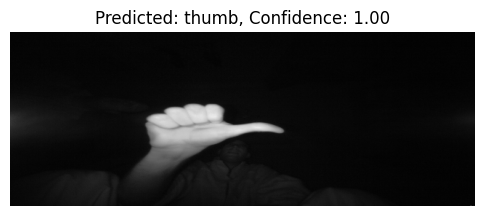

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


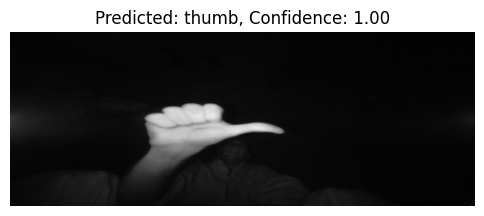

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


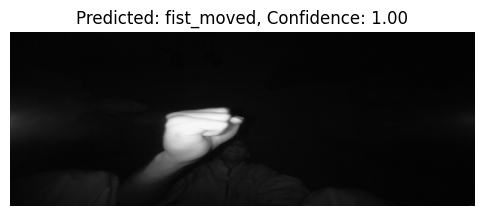

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


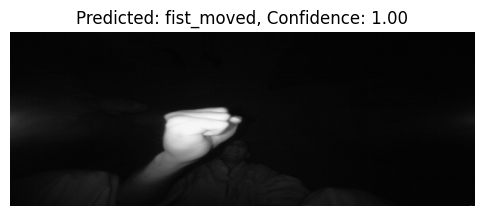

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


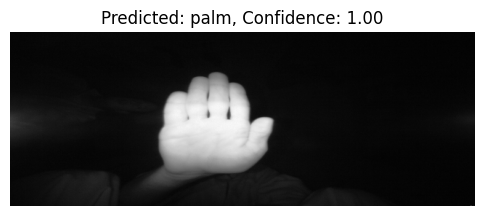

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


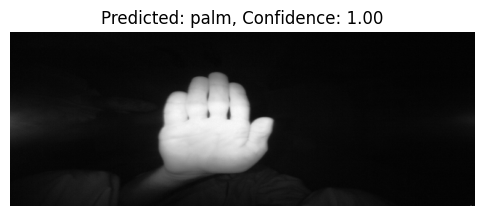

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


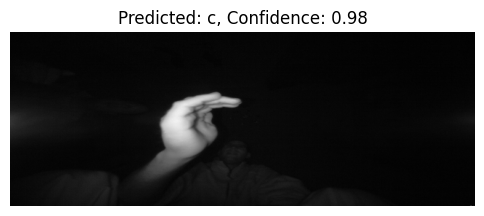

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


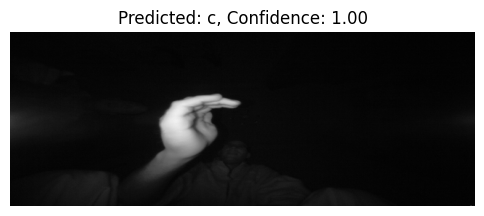

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


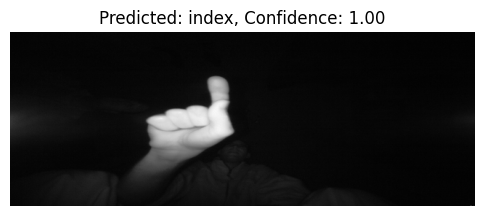

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


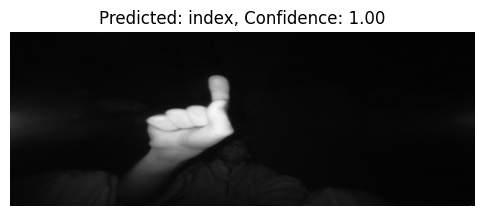

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


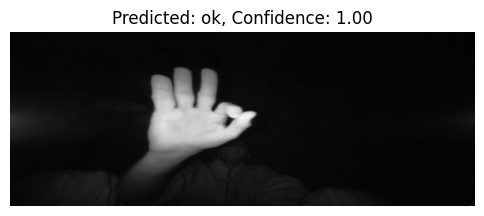

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


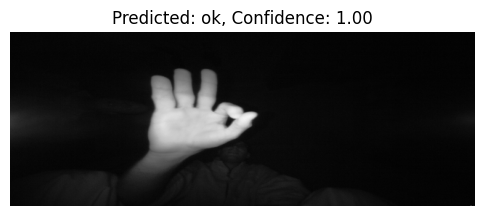

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


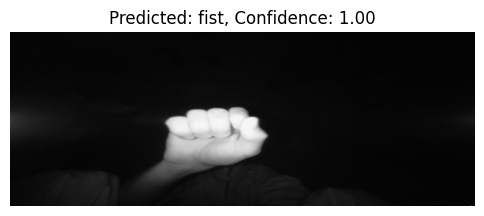

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


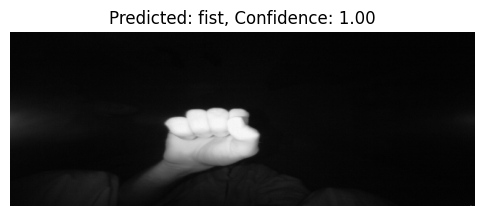

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


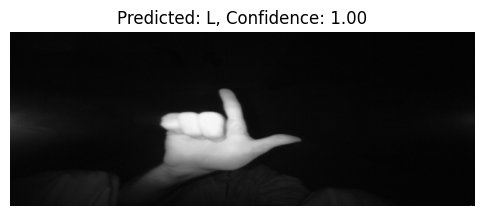

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


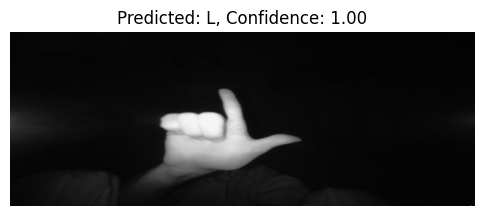

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


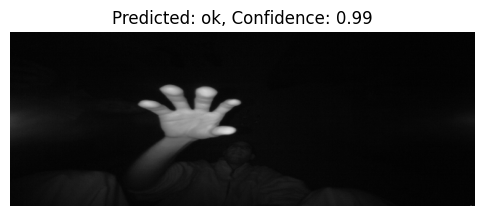

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


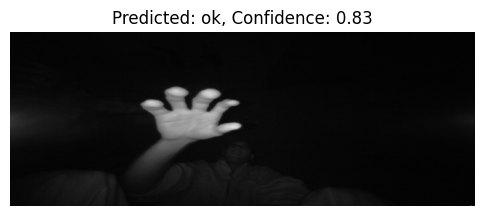

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


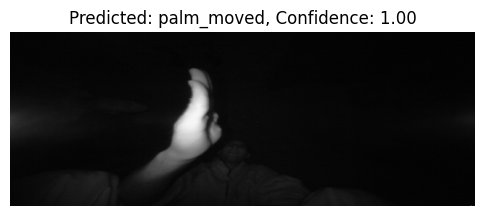

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


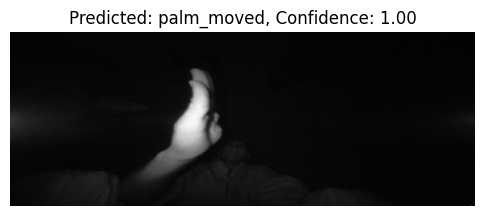

In [ ]:
if images:
    for img_path in images:
        image, img_original = process_image(img_path)
        if image is not None:
            pred= model.predict(image) #Prediction
            prob= pred[0]
            predicted_class= np.argmax(prob)
            confidence= prob[predicted_class]
            label = gesture_classes[predicted_class]
            plt.figure(figsize=(6, 6))
            plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
            plt.title(f'Predicted: {label}, Confidence: {confidence:.2f}')
            plt.axis('off')
            plt.show()
else:
    print("No image files to process.")